In [35]:
from tensorflow.keras.datasets.mnist import load_data

In [36]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [37]:
# y_train[4], x_train[4],
y_train[50000], x_train[50000]

(3, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
         205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
         254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
         

3 <class 'numpy.uint8'>


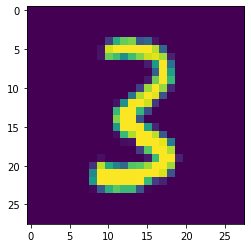

In [38]:
import matplotlib.pyplot as plt

plt.imshow(x_train[50000])
print(y_train[50000], type(y_train[50000]))

In [39]:
# 2차원을 1차원으로 만들어준다. 

In [40]:
x_train = x_train.reshape(-1,28*28 ) / 255
x_train.shape

(60000, 784)

In [41]:
x_test = x_test.reshape(-1, 28*28) / 255
x_test.shape

(10000, 784)

In [42]:
y_train.shape

(60000,)

In [43]:
y_train[2:10]

array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [44]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# apply model

In [45]:
import tensorflow as tf

In [46]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,)))   # input layer
model.add(tf.keras.layers.Dense(64, activation='relu'))   # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu'))    # hidden layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))   # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])


* activation : output이 범주형인데 unique값이 3개 이상일 경우 activation은 softmax를 쓰고, 바이너리(이진, 2개)일 경우에는 sigmoid를 쓴다. : output layer
* hidden layer에서만 쓰는 activation이 따로 있다. (relu)
* regression ---> loss : mse
* binary classification ---> loss : binary crossentropy
* over 3 classification ---> loss : categorical_crossentropy(sparse_categorical_crossentropy)
* activation에서 sigmoid를 쓸 경우 loss율 측정은 binary_crossentropy를 쓰고
  activation에서 softmax를 쓸 경우 loss율 측정은 categorical_crossentropy를 쓴다. 이 경우 y를 onehot 인코딩을 해줘야 한다. 만약 onehot 인코딩을 해주지 않았다면 sparse_categorical_crossentropy를 쓰면 된다. 

In [47]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3152 - acc: 0.9081 - val_loss: 0.1829 - val_acc: 0.9441
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1375 - acc: 0.9584 - val_loss: 0.1409 - val_acc: 0.9583
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0982 - acc: 0.9702 - val_loss: 0.1287 - val_acc: 0.9633
Epoch 4/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0767 - acc: 0.9765 - val_loss: 0.1418 - val_acc: 0.9597
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0608 - acc: 0.9811 - val_loss: 0.1188 - val_acc: 0.9679
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0510 - acc: 0.9841 - val_loss: 0.1252 - val_acc: 0.9661
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0454 - acc: 0.9853 - val_loss: 0.1206 - val_acc: 0.9681
Epoch 8/100
1313/1313 [==============================] 

# evaluation

In [48]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

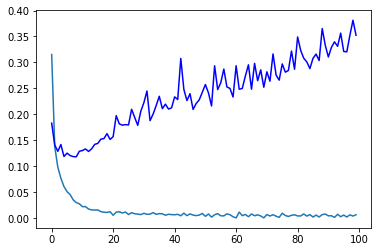

In [49]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'b-')
plt.show()

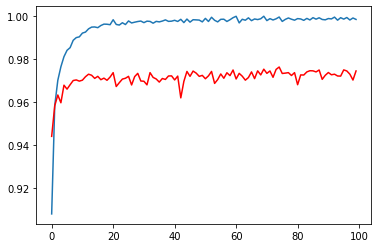

In [50]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

# service

In [51]:
y_test[30]

3

In [52]:
import numpy as np
# np.set_printoptions(precision=8)

pred = model.predict(x_test[30:31])   # 영역을 지정해야 함. 
pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 4.8193994e-33, 0.0000000e+00, 2.9996076e-35,
        1.6062534e-36, 4.3403576e-37]], dtype=float32)

In [53]:
np.argmax(pred, axis=1)

array([3])

In [54]:
y_test[30]

3

In [55]:
a = np.arange(6).reshape(2,3) + 10
print(a)
np.argmax(a, axis=0)

[[10 11 12]
 [13 14 15]]


array([1, 1, 1])

In [56]:
np.argmax(np.array([[10, 11, 12]]), axis=1)

array([2])

In [57]:
model.save('./model_save')    # 폴더 묶음으로 저장할 때 

INFO:tensorflow:Assets written to: ./model_save/assets


In [58]:
model.save('./model_save01.h5')    # 파일 하나로 저장할 때  / h5는 큰 데이터가 들어가는 데이터 포맷임(마치 엑셀같은...)

In [59]:
model_load = tf.keras.models.load_model('./model_save01.h5')

In [60]:
model_load

In [61]:
load_pred = model_load.predict(x_test[30:31])
load_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 4.8193994e-33, 0.0000000e+00, 2.9996076e-35,
        1.6062534e-36, 4.3403576e-37]], dtype=float32)

In [62]:
load_pred, np.argmax(load_pred)

(array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 4.8193994e-33, 0.0000000e+00, 2.9996076e-35,
         1.6062534e-36, 4.3403576e-37]], dtype=float32), 3)

딥러닝의 강점 : 전통적인 머신러닝은 재교육이 안되지만 딥러닝은 저장된 데이터를 불러와서 다시 교육할 수 있다.(기존것은 남아있고 재교육이 되는 것)